# Data Preparation

In [466]:
import pandas as pd

raw_data = pd.read_csv("../Datasets/adult income.csv")
raw_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- Handling the missing values

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

income_data = pd.read_csv("../Datasets/adult income.csv")

income_data[income_data == "?"] = np.nan

print(income_data.isnull().sum())
print(income_data.shape)

income_data = income_data.dropna(axis=0)

print(income_data.isnull().sum())
print(income_data.shape)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
(48842, 15)
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
(45222, 15)


### Sidenote:
I was concerned with using LabelEncoder because I wasn't sure if the random number assignment would implicitly be interpreted when I run my analysis as ordinal in nature while I wanted it to be nominal. I used ChatGPT to clarify this and it gave me a green light:

When using LabelEncoder:

- Each category is represented by a unique integer value.
- There is no implied ordinal relationship or hierarchy among the encoded values.
- The encoded variable is treated as nominal, meaning that the categories are considered distinct with no inherent order or ranking.

In line with this, I decided to use LabelEncoder for each column that contained type str

In [195]:
from sklearn.preprocessing import LabelEncoder

le_native_country = LabelEncoder()
income_data['native-country_encoded'] = le_native_country.fit_transform(income_data['native-country'])

le_workclass = LabelEncoder()
income_data['workclass_encoded'] = le_workclass.fit_transform(income_data['workclass'])

le_gender = LabelEncoder()
income_data['gender_encoded'] = le_gender.fit_transform(income_data['gender'])

le_race = LabelEncoder()
income_data['race_encoded'] = le_race.fit_transform(income_data['race'])

le_relationship = LabelEncoder()
income_data['relationship_encoded'] = le_relationship.fit_transform(income_data['relationship'])

le_occupation = LabelEncoder()
income_data['occupation_encoded'] = le_occupation.fit_transform(income_data['occupation'])

le_marital = LabelEncoder()
income_data['marital-status_encoded'] = le_marital.fit_transform(income_data['marital-status'])

# K-Nearest Neighbor Classification

- Creating the X and Y values for the model and splitting the dataset into train and tes
- Choosing the number 6 as a random neighbor number for now

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn=KNeighborsClassifier(n_neighbors=6)

X = income_data.drop(columns = ["income","fnlwgt","native-country",
                               "workclass","race","gender","relationship",
                                "occupation","relationship","marital-status",
                                "education"
                               ]).to_numpy()
y = income_data["income"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)


In [211]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [213]:
y_pred=knn.predict(X_test)

knn.score(X_test, y_test)

0.8450652318124862

- Looking for an optimal neighbor number

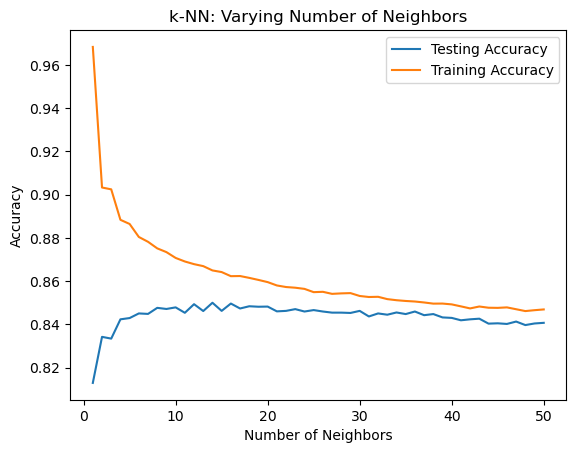

In [215]:
neighbors = np.arange(1, 51)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

- It seems like the number is somewhere between 10 and 20 so let's check that

In [218]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,21)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.8471540743381233


- The optimal neighbor number seems to be 14. Let me run the model again with that and look at the reports

In [222]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9602  603]
 [1432 1930]]
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     10205
        >50K       0.76      0.57      0.65      3362

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



- The numbers look okay. The f1-score of >50K is a bit low but that might be because there are much less cases of it compared to <=50K
- Let me also cross-validate and see if the model performs well

In [287]:
cv_results = cross_val_score(knn, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)})")

0.849
0.006
Confidence interval for this model: 0.846-0.852)


## Overall evaluation of KNN Model:

The model seems to be okay with approximately an 85% accuracy rate. But without fitting the other models, I cannot really say anything about this model since the important criterion is the relative performance of a given model across all models.

# Decision Tree

- Let me pick a random depth number (25) for now to see if the code works well and get some reports

In [322]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier(max_depth=25)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba

print('Depth of the Decision Tree :', clf.get_depth())

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Depth of the Decision Tree : 25
[[9045 1160]
 [1275 2087]]
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88     10205
        >50K       0.64      0.62      0.63      3362

    accuracy                           0.82     13567
   macro avg       0.76      0.75      0.76     13567
weighted avg       0.82      0.82      0.82     13567



- A depth of 25 is a bit large but still
- The f1-scores are slightly lower but that might be because I have not optimized the model yet.
- Let me look for better criteria for the model

In [326]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": randint(1,26),
              "max_features": randint(1, 50),
              "min_samples_leaf": randint(1, 50),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 27, 'min_samples_leaf': 28}
Best score is 0.8546517137892907


- Let me run the model again with the updated parameters and get the reports again

In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

best_params = {
    'criterion': 'gini',
    'max_depth': 14,
    'max_features': 27,
    'min_samples_leaf': 28
}

clf = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf']
)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Depth of the Decision Tree:', clf.get_depth())

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Depth of the Decision Tree: 14
[[9531  674]
 [1358 2004]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     10205
        >50K       0.75      0.60      0.66      3362

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



- The numbers in the updated version are almost identical to the KNN model
- Let me plot the tree to gain some insight

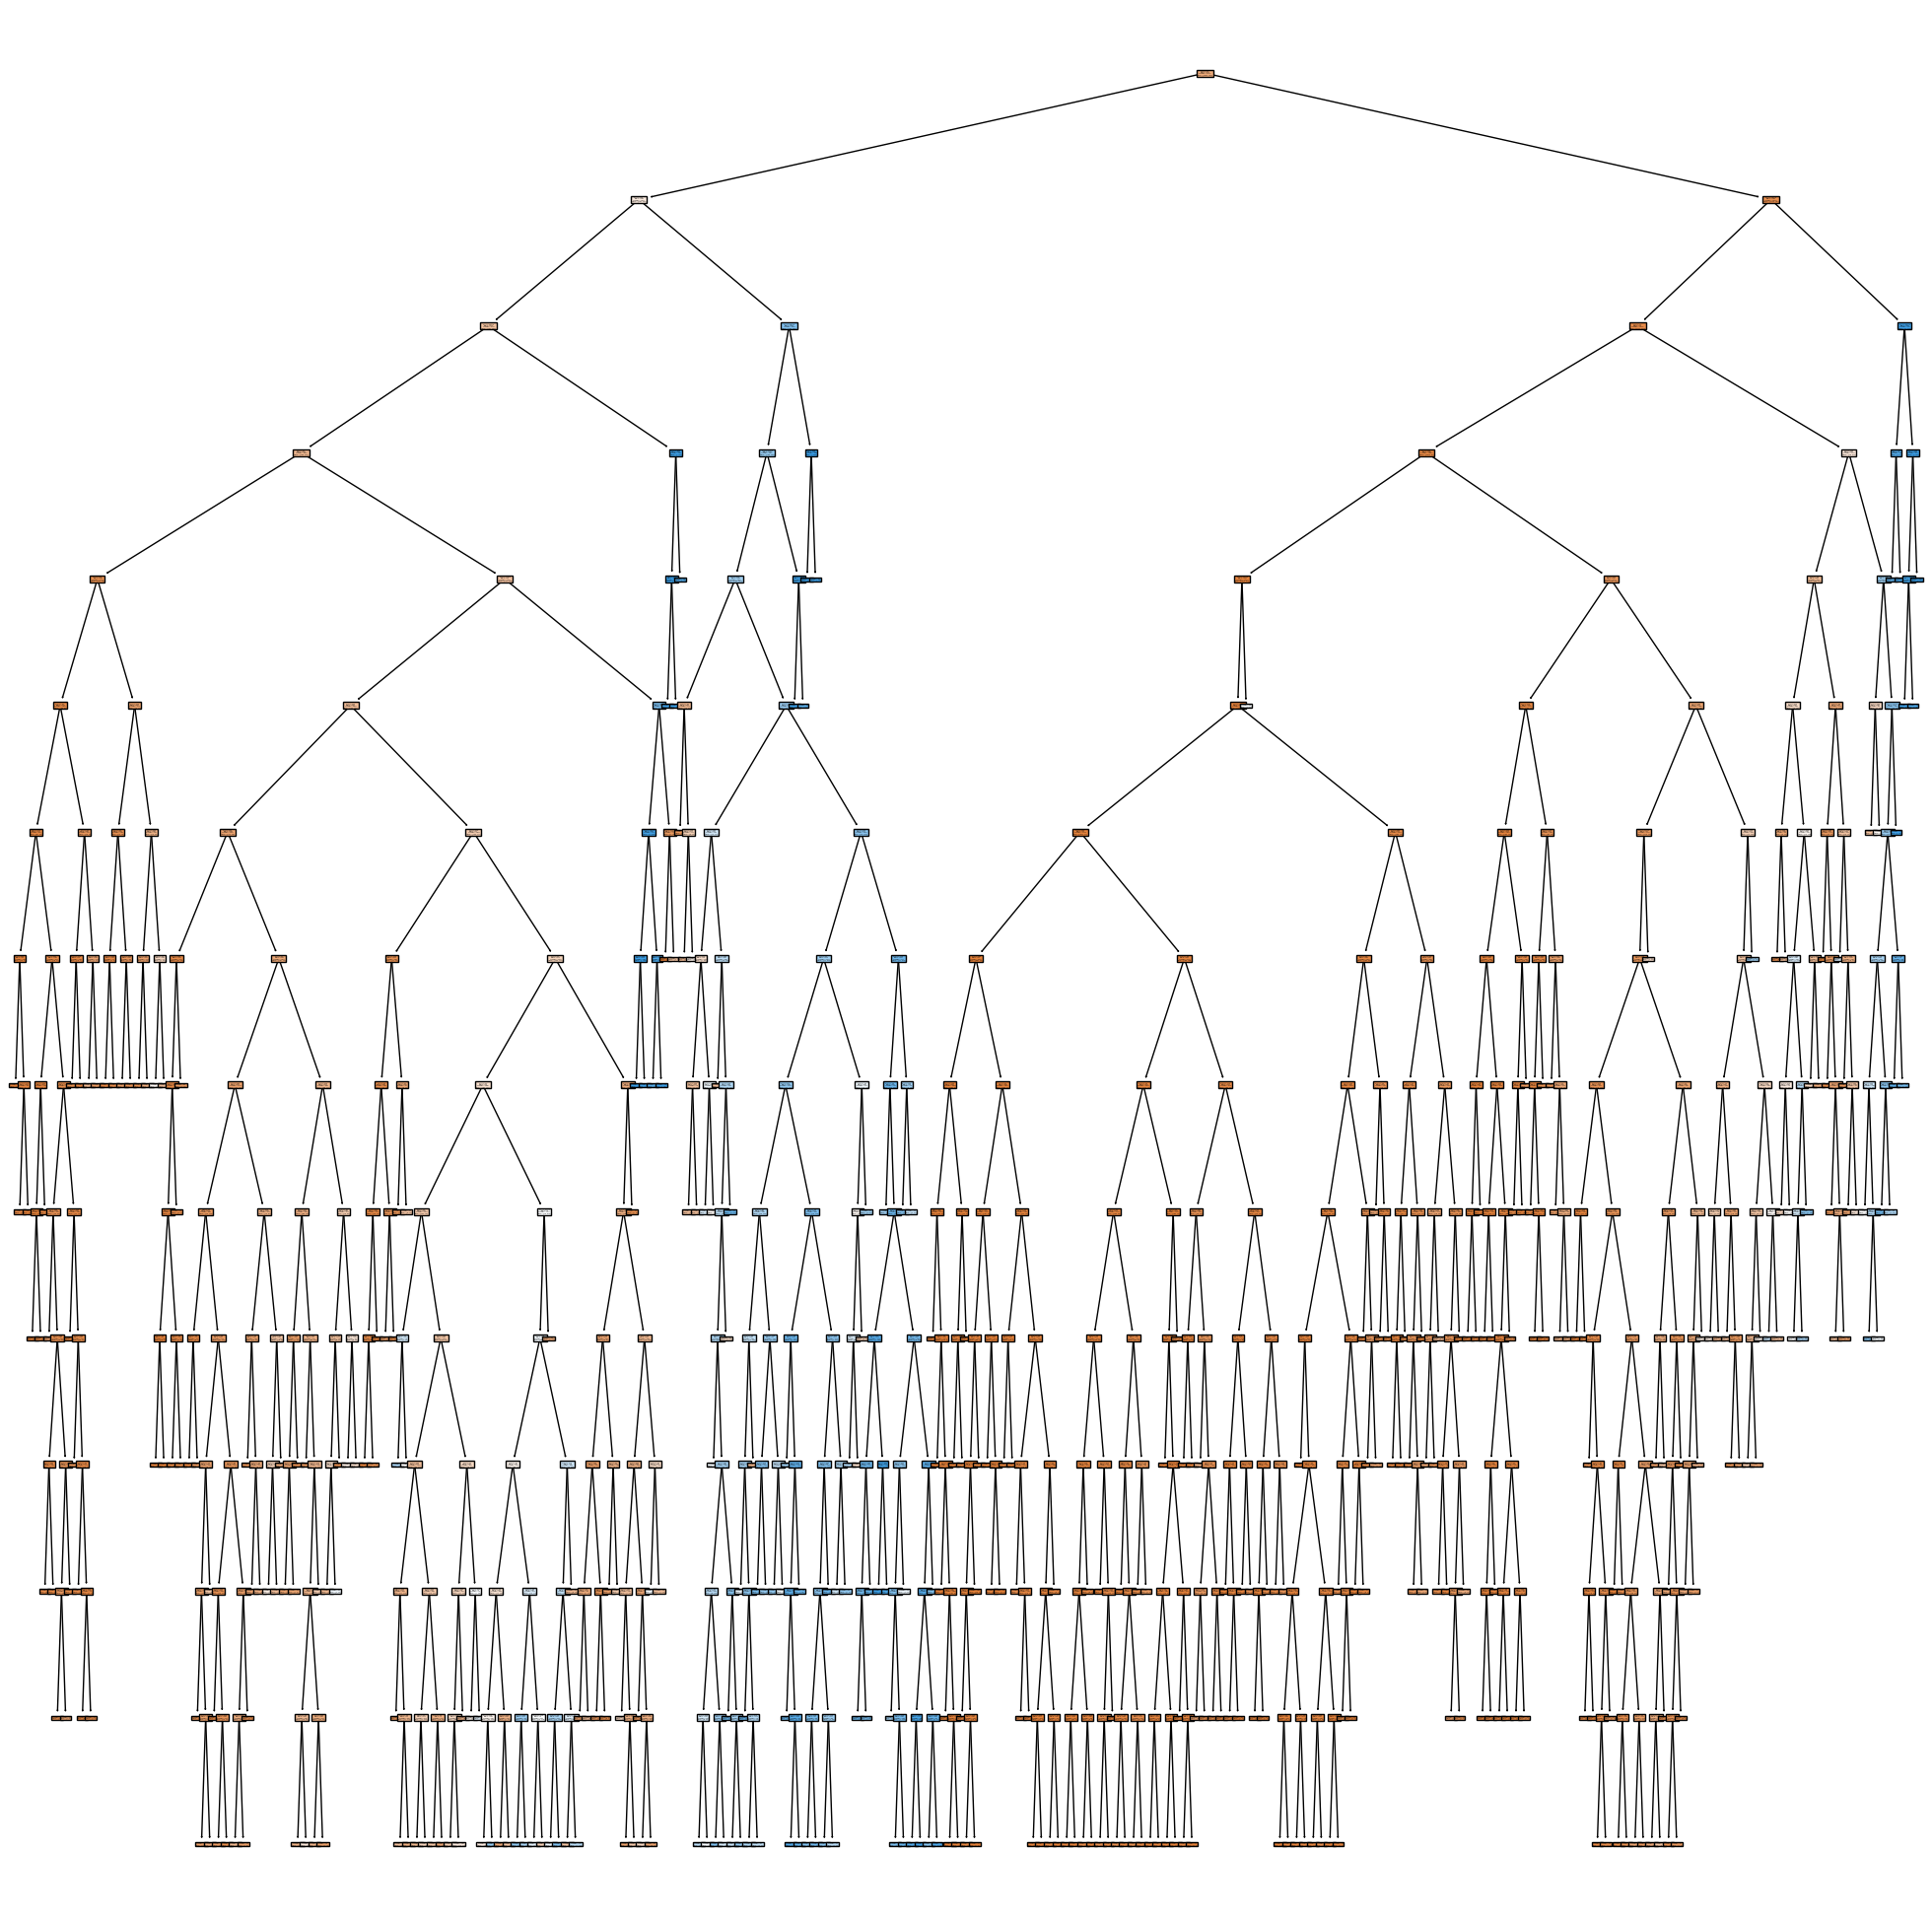

In [298]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
plot_tree(clf, filled=True)
plt.show()

- That did not give me any kind of insight because it is very complex and impossible to see...
- Let me look at the first 3 leaves

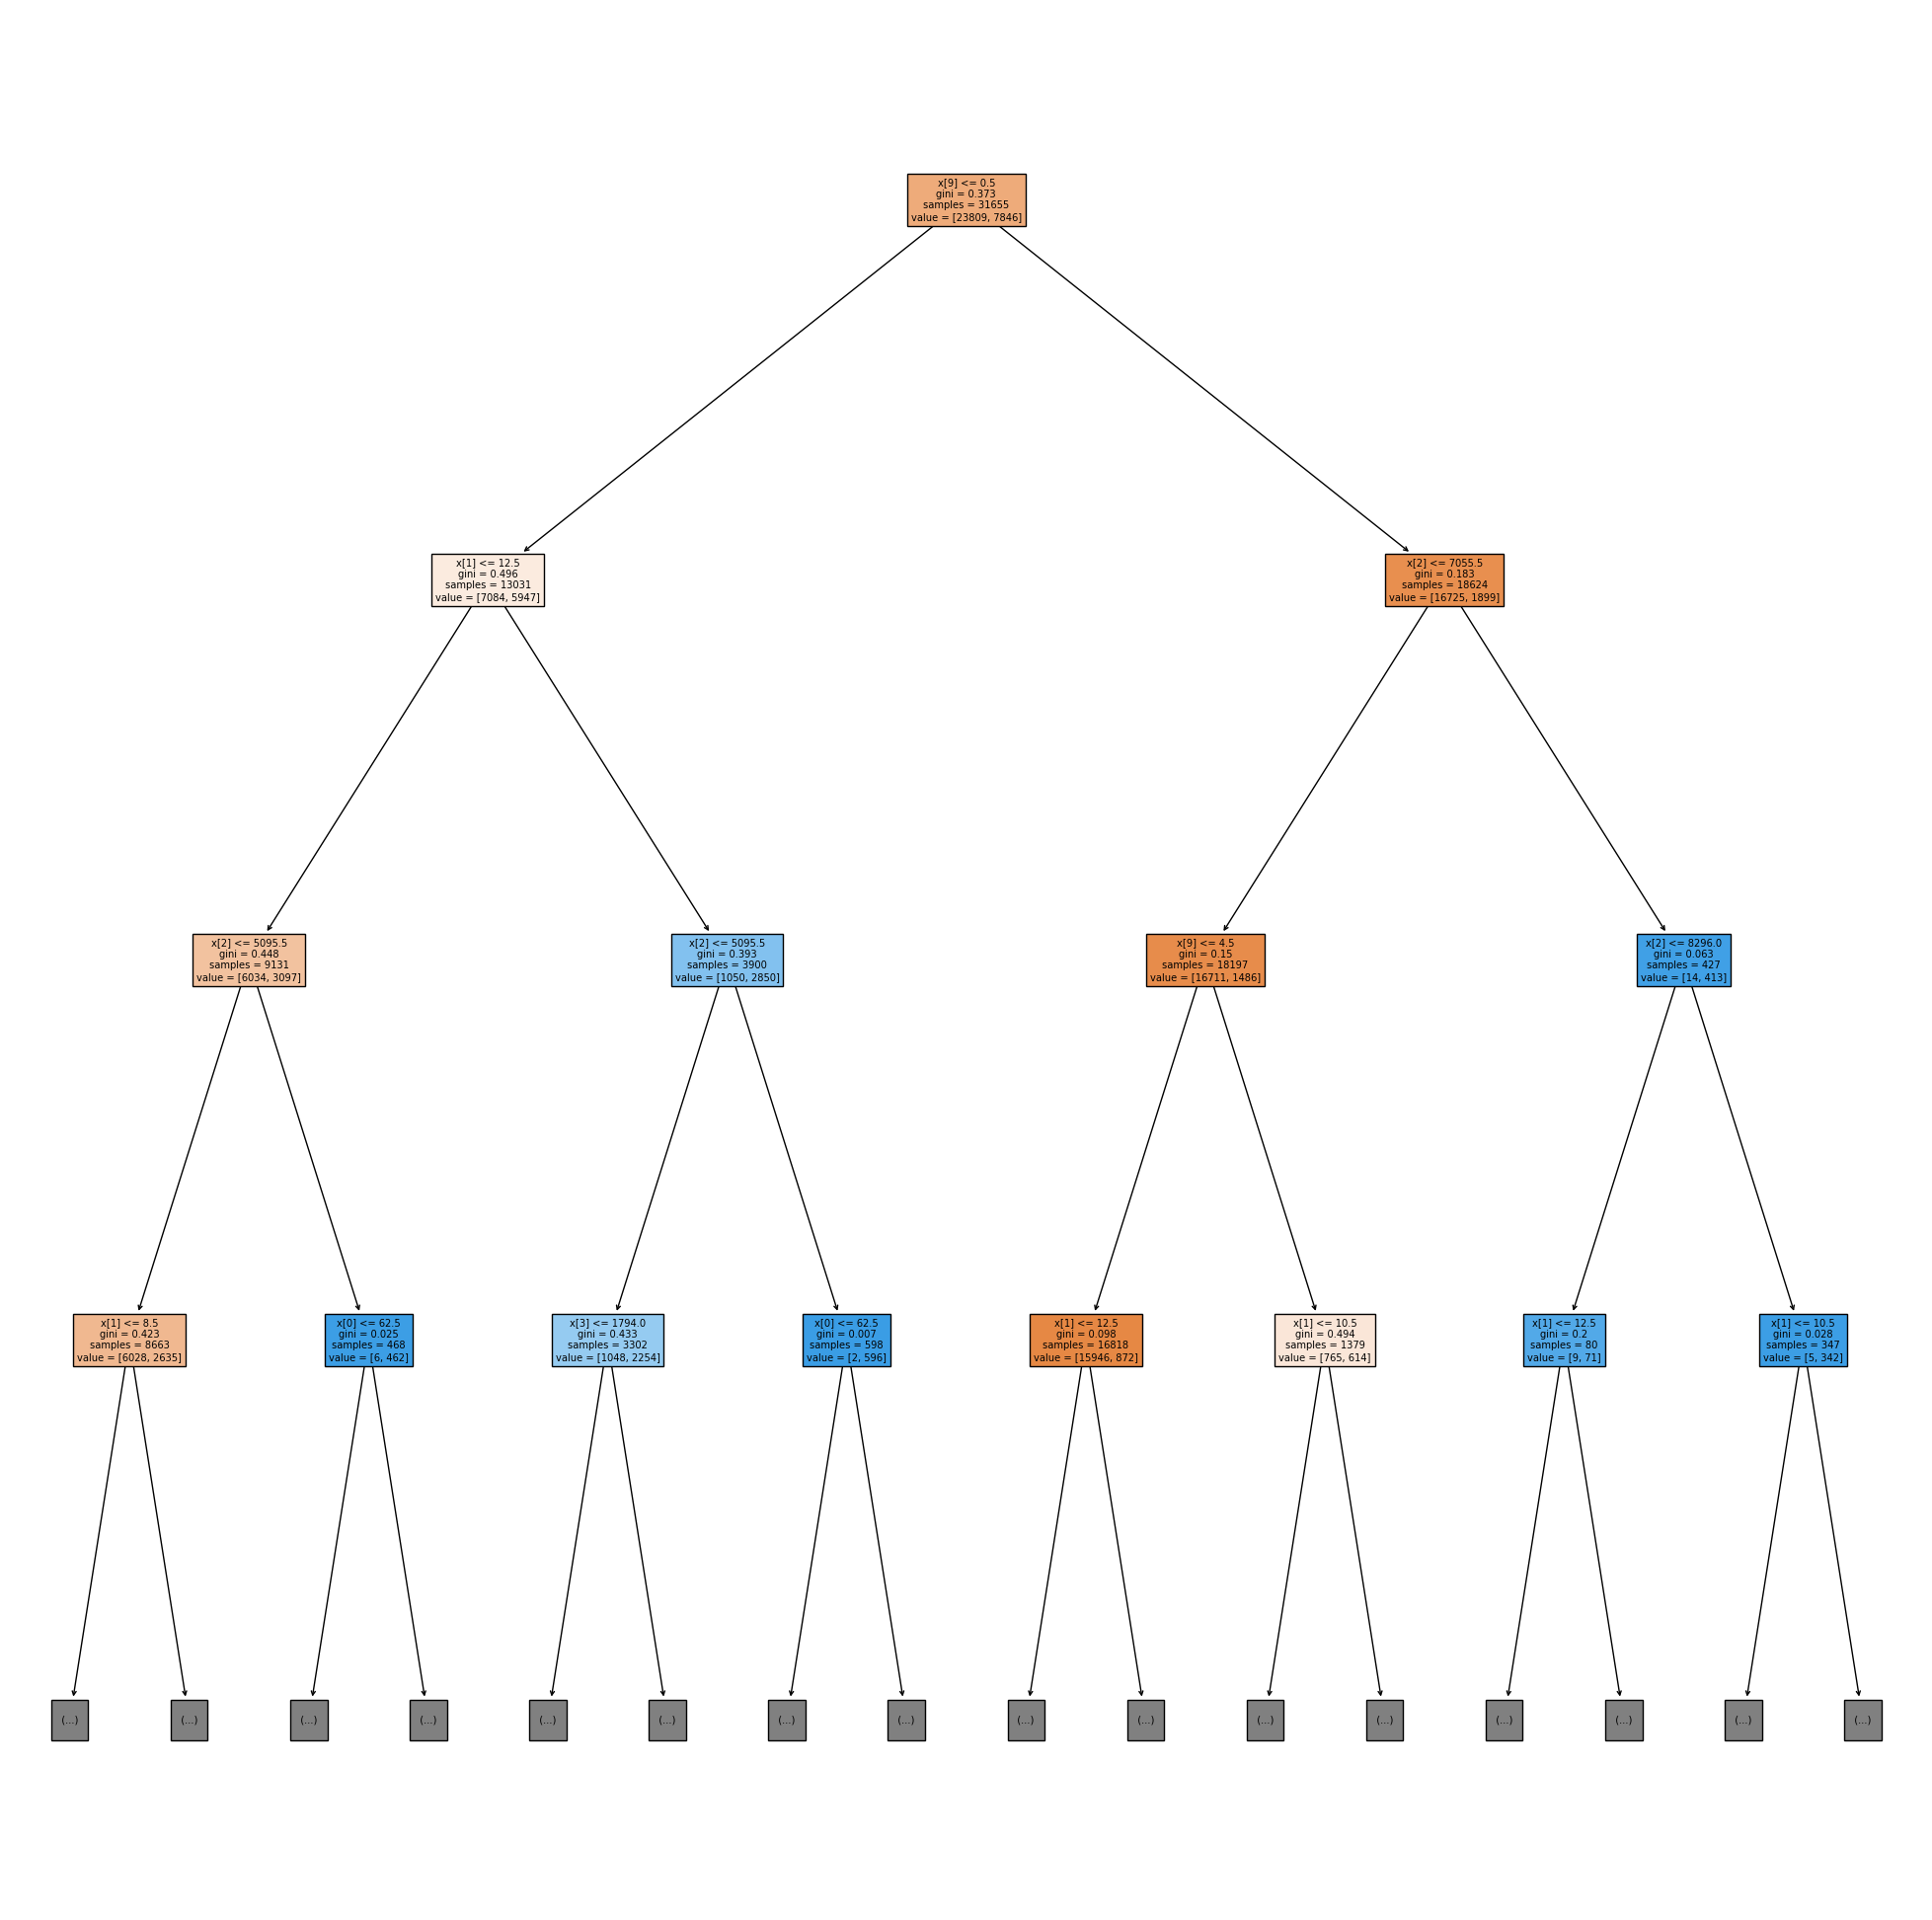

In [308]:
plt.figure(figsize=(25,25))
plot_tree(clf, filled=True, max_depth=3)
plt.show()

- This still does not make a a lot of sense to me so I'll just go ahead and look at the cross validation reports

In [332]:
cv_results = cross_val_score(clf, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)}")

0.854
0.006
Confidence interval for this model: 0.851-0.857


## Overall evaluation of Decision Tree

The decision tree model seems to perform very similarly to the KNN method. Although the 95% confidence intervals in the cross-validation are overlapping slightly, a t-test would probably yield a significant p-value with an alpha level of .95. Although it is statistically significant, the difference between an .849% and .854% accuracy rate is not necessarily meaningfully different in an intuitive sense. The same thing can be said about the f-1 scores as well. So, I think the guiding principle here should be which model is less costly to run and is more interpretable. 

# Logistic Regression

In [334]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/cem/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [423]:
from sklearn.metrics import roc_auc_score


y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred_prob)


0.8163525916218998

- Apparently, I need to convert the target variable into 1s and 0s or somethings go awry. So I did that before continuing

In [402]:
income_data["income_dummy"] = income_data["income"].map({"<=50K": 0, ">50K": 1})

print(income_data["income"].head())
print(income_data["income_dummy"].head())

y_dummy = np.array(income_data["income_dummy"])
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.3, random_state=21, stratify=y_dummy)

0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: income, dtype: object
0    0
1    0
2    1
3    1
5    0
Name: income_dummy, dtype: int64


- Let me check the model with the penalizers as well

In [417]:
from sklearn.linear_model import LogisticRegression

ridge_log_reg = LogisticRegression(penalty='l2', C=0.1) 

ridge_log_reg.fit(X_train, y_train)

ridge_log_reg_pred = ridge_log_reg.predict(X_test)

accuracy = ridge_log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, ridge_log_reg_pred))
print(classification_report(y_test, ridge_log_reg_pred))


Accuracy: 0.8035674799144984
[[9612  593]
 [2072 1290]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     10205
           1       0.69      0.38      0.49      3362

    accuracy                           0.80     13567
   macro avg       0.75      0.66      0.69     13567
weighted avg       0.79      0.80      0.78     13567



/Users/cem/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [419]:
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')

lasso_log_reg.fit(X_train, y_train)

lasso_log_reg_pred = ridge_log_reg.predict(X_test)

accuracy = lasso_log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, lasso_log_reg_pred))
print(classification_report(y_test, lasso_log_reg_pred))


Accuracy: 0.8214785877496867
[[9612  593]
 [2072 1290]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     10205
           1       0.69      0.38      0.49      3362

    accuracy                           0.80     13567
   macro avg       0.75      0.66      0.69     13567
weighted avg       0.79      0.80      0.78     13567



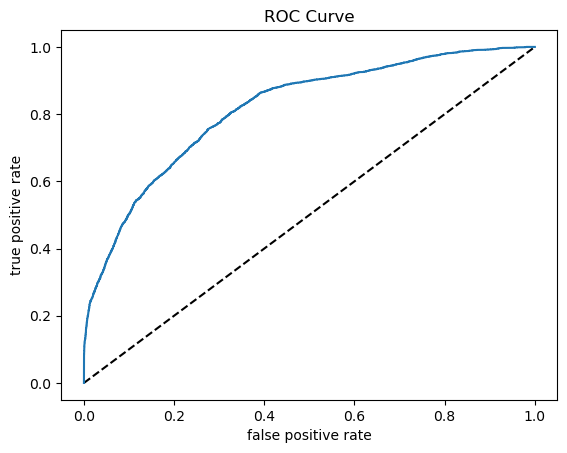

0.8163525916218998

In [397]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.show()

y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred_prob)

In [ ]:
cv_results = cross_val_score(logreg, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)}")

It is very hard to see the output because of the warnings so I deleted the output and copy pasted the relevant part here:
For the initial regression:
- 0.801
- 0.006
- Confidence interval for this model: 0.798-0.804


For the Ridge one:
- 0.802
- 0.007
- Confidence interval for this model: 0.799-0.805

Without any penalizers:
- 0.801
- 0.006
- Confidence interval for this model: 0.798-0.804


## Overall evaluation of Logistic Regression:

It seems like the logistic regression model performed worst compared to the other two models with approximately an 80% accuracy in the cross validation part and also worse in the f-1 scores as well. To be honest, I'm not very sure if I did the hyperparameter tuning part correctly with this model, so that might be an issue.